In [158]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave

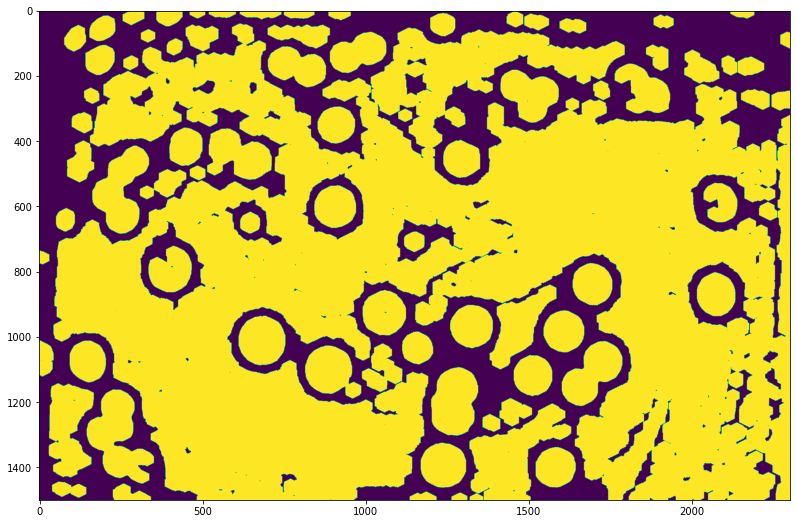

In [184]:
image = 'real.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()

crop = img[100:1600,150:2450]
gray = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 11)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,57,3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=10)

# blur = cv2.medianBlur(gray, 11)
# img = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,75,2)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
# img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)

# find contours and filter using contour area and aspect ratio
# cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     peri = cv2.arcLength(c, True)
#     approx = cv2.approxPolyDP(c, 0.04 * peri, True)
#     area = cv2.contourArea(c)
#     if len(approx) > 5 and area > 500 and area < 50000:
#         ((x,y), r) = cv2.minEnclosingCircle(c)
#         cv2.circle(img, (int(x), int(y)), int(r), (36,255,12), 2)

plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(opening)

In [160]:

# print (all_circs_rounded)
# print (all_circs_rounded.shape)
# print ('there are' + str(all_circs_rounded.shape[1]) + 'circles')

In [161]:
all_circs = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 5, 120, param1=50, param2=30, minRadius=20, maxRadius=100)
all_circs_rounded = np.uint16(np.around(all_circs))

In [162]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]), i[2], (50, 200, 200), 5)
    cv2.circle(img_orig, (i[0], i[1]), 2, (255,0,0), 3)
    count += 1

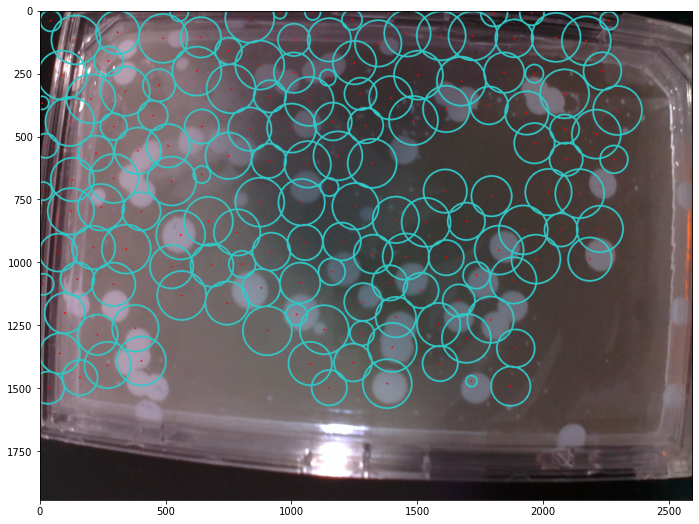

In [163]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img_orig)